Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/01_SimplePreprocessingAndVisualization'
except ImportError as e:
    pass

## Exercise 1: Simple Preprocessing and Visualization
  

### 1.1 Python Installation

Download Anaconda and install the software on your laptop. Additional
information on how to install Anaconda can be found here:
https://docs.anaconda.com/anaconda/install/

Optionally use [Google Colab](https://colab.research.google.com/)

### 1.2 Load and Preprocess the Students Dataset

Import the students data set into Python. The students data set is provided in ILIAS as an Excel file. Use different preprocessing operators and plotters to answer the following questions:

1.2.1 What is the most common mark that has been given in FSS2010? To find the answer filter the examples and draw a histogram afterwards.

1.2.2 Is there a correlation between the mark and the number of attended classes? Find the answer using a scatter plot.

1.2.3 Does this correlation hold for all students? Find the answer by aggregating the examples by student and use a scatter plot afterwards.

### Solution 1.2 Load and Preprocess the Students Dataset

First we need to import the pandas package. Then we can read the excel file into a dataframe using the [read_excel()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) function.

In [2]:
# import the pandas package
import pandas as pd

# use the read_excel() function to load the excel file into a dataframe
student_data = pd.read_excel('Student Data for Exercise 1.xls')

# look at the first few records to see that it worked
student_data.head()

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


#### 1.2.1 What is the most common mark that has been given in FSS2010? To find the answer filter the examples and draw a histogram afterwards.

To draw a histogram, we need to import the matplotlib package, too. 

Then we can prepare the data by selecting all records with the Semester column equal to 'FSS2010'. 

Using the prepared dataframe, we can plot a [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) for the Mark column and find the answer to the question.

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13
1,FSS2010,Tanja Becker,Database Systems I,2.0,12
2,FSS2010,Mariano Selina,Database Systems I,1.7,5
3,FSS2010,Otto Blacher,Database Systems I,2.3,13
4,FSS2010,Frank Fester,Database Systems I,2.0,13


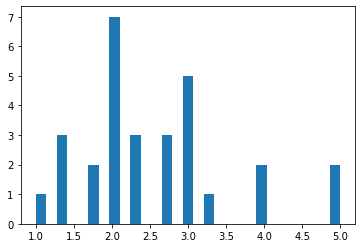

In [3]:
# import pyplot from matplotlib
import matplotlib.pyplot as plt

# select all records with Semester equal to 'FSS2010'
student_fss_2010 = student_data[student_data['Semester'] == 'FSS2010']

# display the first few records to see that it worked
display(student_fss_2010.head())

# create the histogram using the hist() function 
#  from the data in the Mark column for as many bins as there are values for Mark
plt.hist(student_fss_2010['Mark'], bins=len(student_fss_2010['Mark']))
# and show it
plt.show()

The most common mark is 2.0

#### 1.2.2 Is there a correlation between the mark and the number of attended classes? Find the answer using a scatter plot.

We have prepared the data already and just need to create a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). We set the x-axis to the number of attended classes and the y-axis to the mark.

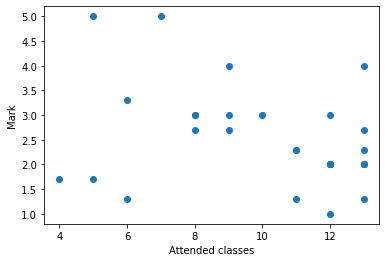

In [4]:
# create a scatter plot using the scatter() function
#  using the Attended column for the x-axis and the Mark column for the y-axis
plt.scatter(student_fss_2010['Attended'], student_fss_2010['Mark'])

# set the axis labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# show the plot
plt.show()

Yes, students that attend a lot of classes usually get better marks.

#### 1.2.3 Does this correlation hold for all students? Find the answer by aggregating the examples by student and use a scatter plot afterwards.

To answer this question we need to change the dataset again.
We want to aggregate by students, who are identified by their Name in this dataset, and find out something about their values on average.
So we have to group by Name and calculate the mean() of all other columns.

To be able to interpret the plot, we also label each data point with the name of the student.

,Mark,Attended
Name,,
Alex Krausche,1.433333,12.666667
Avid Morvita,3.100000,11.333333
Frank Fester,2.233333,12.666667
Mariano Selina,1.566667,5.000000
Michaela Martke,3.766667,6.333333
Otto Blacher,2.100000,12.333333
Steve Queck,2.800000,8.333333
Susanne Müller,2.433333,12.000000
Tanja Becker,1.650000,11.500000


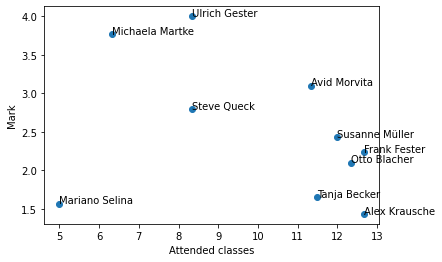

In [5]:
# group the data by student name and calculate the mean values of all other columns
student_fss_2010_grouped = student_fss_2010.groupby('Name').mean()

# display the first few records to see that it worked
display(student_fss_2010_grouped)

# create a scatter plot with the same axes as in the last plot, but this time from the aggregated dataset
plt.scatter(student_fss_2010_grouped['Attended'], student_fss_2010_grouped['Mark'])

# set the axis labels
plt.xlabel("Attended classes")
plt.ylabel("Mark")

# annotate each data point with the students name
for (name, mark, attended) in student_fss_2010_grouped.itertuples():
    plt.annotate(name, (attended, mark))

# show the plot
plt.show()

There is one outlier. Mariano Selina is getting very good marks without attending too many classes. All other students follow almost the rule “the more attended classes, the better the grade.”

### 1.3 Visual Exploration of the Iris Dataset
The dataset describes three types of Iris flowers:
- Setosa
- Virginica
- Versicolour

There are four (non-class) attributes
- Sepal width and length
- Petal width and length

Load the Iris dataset and use different plotters to visualize and explore the data set.

1. Which attribute combination and (approximate) value ranges determine the type of Iris flower?

### Solution 1.3 Visual Exploration of the Iris Dataset

First we need to load the dataset into a dataframe.

In [6]:
# load the csv file using the read_csv() function
iris = pd.read_csv("iris.csv")

# look at the first few records to see that it worked
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Then we create a scatter plot to visualise the dataset. As there are four features that we consider, we need to inspect 6 different combinations of two features and create a scatter plot for each of them.

We start by specifying which features we consider and creating their combinations. Here we make use of the itertools package (import it first!), which provides the function [combinations()](https://docs.python.org/2/library/itertools.html#itertools.combinations).

Then we create a figure to which we will later add sub plots for each combination.
We iterate over all combinations using a for loop, and for each combination we add a sub plot, create the scatter plot, and set the axis labels.
When creating the scatter plot, we first group the dataset by the name of the flowers and plot each type of flower separately so that the data points are drawn in different colours.
Finally, we add a legend for the colours to the last sub plot and draw the figure.

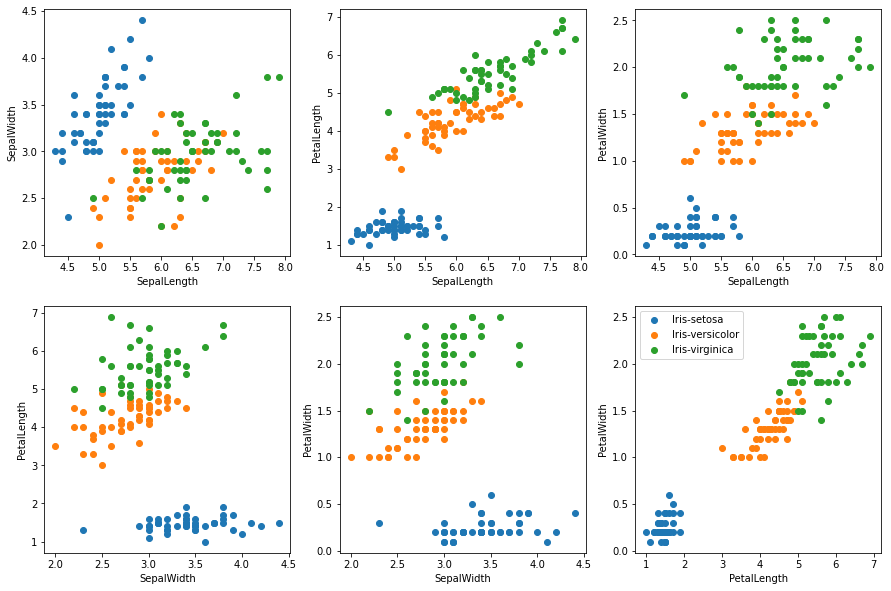

In [7]:
import itertools

# create a list of all columns that we are considering
features = [ 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth' ]

# create all combinations of considered columns
combinations = itertools.combinations(features, 2)

# create a figure and specify its size
fig = plt.figure(figsize=(15,10))

# go through all combinations and create one plot for each
figure_index = 1
for combination in combinations:
    # add a sub plot to the figure
    axs = fig.add_subplot(2,3,figure_index)
    
    # group the data by Name (so we see the data points for different types of flowers in different colours)
    for name, group in iris.groupby('Name'):
        # plot the data points for the current group and feature combination
        axs.scatter(group[combination[0]], group[combination[1]], label=name)
    
    # set the axis labels of the current sub plot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
        
    # increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index+=1
    
# add a legend to the last sub plot
plt.legend()
    
# show the plot
plt.show()

By inspecting the plots for the different combinations of attributes, we find that the combination of petal width and petal length separates the different types of flowers quite well.
So, we create a new plot for this combination and [plot areas](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) to show a potential decision boundary for each type of flower.

This decision boundary is obtained by manually looking at the plot, but we will see methods to automate this step in future exercises.

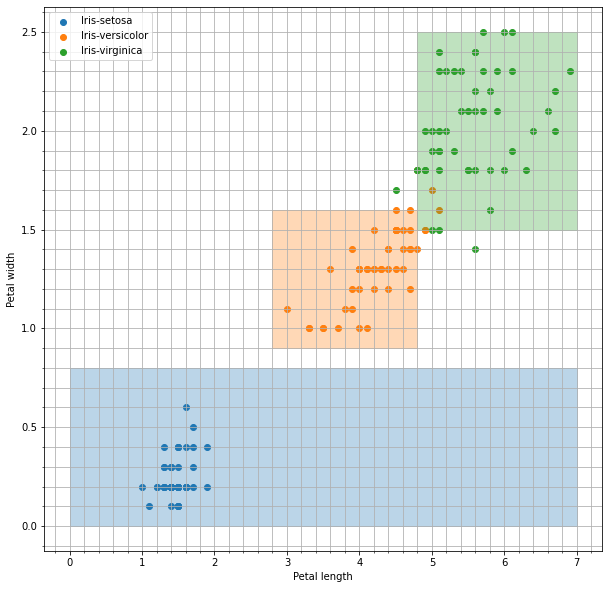

In [8]:
# create a figure and specify its size
plt.figure(figsize=(10,10))

# plot the data for each type of flower individually again
for name, group in iris.groupby('Name'):
    plt.scatter(group['PetalLength'], group['PetalWidth'], label=name)
    
# plot the decision boundary
# iris-setosa
plt.fill_between([0.0, 7.0], 0.0, 0.8, color="C0", alpha=0.3)

# iris versicolor
plt.fill_between([2.8, 4.8], 0.9, 1.6, color="C1", alpha=0.3)

# iris virginica
plt.fill_between([4.8, 7.0], 1.5, 2.5, color="C2", alpha=0.3)

#finer grid (optional)
plt.minorticks_on()
plt.grid(which='both')

# set axis labels
plt.xlabel("Petal length")
plt.ylabel("Petal width")

# add legend
plt.legend()

# show the plot
plt.show()

| Type of Iris Flower | Attribute combination and value ranges              |
| ------------------- |---------------------------------------------------- |
| Setosa              | PetalWidth < 0.8                                    |
| Virginica           | PetalLength > 4.8 AND PetalWidth > 1.5              |
| Versicolour         | 2.8 < PetalLength < 4.8 AND 0.9 < PetalWidth <= 1.6 |